In [1]:
#meta 5/23/2022 Linear Regression on Time Series with SciKit Learn and Pandas
#Author: Kasim Te
#refer to http://www.kasimte.com/2020/02/09/linear-regression-from-time-series-data-using-scikit-learn.html

#history
# 5/23/2022 TimeSeries Model as Linear Regression
#      myVis


In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

print(pd.__version__, np.__version__)

1.0.3 1.21.0


# Linear Regression on Time Series with SciKit Learn and Pandas

## 0. Create time series data
There are many ways to do this. Refer to the Time series section in the pandas documentation for more details. Here, we take a date range for the year of 2020 and create a datetime index based on each day.


In [3]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 12, 31)
index = pd.date_range(start, end)
index, len(index)


(DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
                '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
                '2020-01-09', '2020-01-10',
                ...
                '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
                '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
                '2020-12-30', '2020-12-31'],
               dtype='datetime64[ns]', length=366, freq='D'),
 366)

In [4]:
#Create a pandas dataframe
# add an artificial “value” column that is a multiple of 5 for some generic target data.

multiple = 5
l = list(range(0, len(index)*multiple, multiple))
df = pd.DataFrame(l, index = index)
df.index.name = "date"
df.columns = ["value"]
df

,value
date,
2020-01-01,0
2020-01-02,5
2020-01-03,10
2020-01-04,15
2020-01-05,20
...,...
2020-12-27,1805
2020-12-28,1810
2020-12-29,1815


## 1. Feature engineering from time series
We want something sensible to predict from. One simple option is to convert the date index into an integer from the minimum start date

In [5]:
df['days_from_start'] = (df.index - df.index[0]).days; df

,value,days_from_start
date,,
2020-01-01,0,0
2020-01-02,5,1
2020-01-03,10,2
2020-01-04,15,3
2020-01-05,20,4
...,...,...
2020-12-27,1805,361
2020-12-28,1810,362
2020-12-29,1815,363


## 2. Model
Simple Regression

In [6]:
#reshape input variables x for input to the model
x = df['days_from_start'].values.reshape(-1, 1)
y = df['value'].values

model = LinearRegression().fit(x, y)

print(model.score(x, y))
model.coef_, model.intercept_

1.0


(array([5.]), -3.410605131648481e-13)

##### Vis: Data and Model

In [8]:
y_hat_idx = [[1], [7], [50]]
y_hat = model.predict(y_hat_idx)
y_hat

array([  5.,  35., 250.])

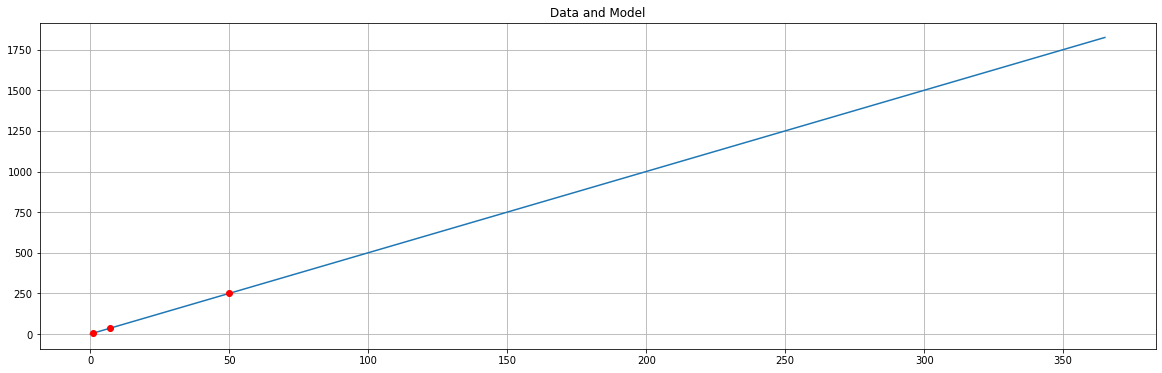

In [9]:
plt.figure(figsize=(20, 6))
plt.plot(x, y)
plt.plot(y_hat_idx, y_hat, 'ro')
plt.title('Data and Model')
plt.grid(True)
plt.show()

In [ ]:
#y_hat = model.predict(x)